# <span style="color:green"><ins>Chapitre 4 : devoir</ins></span>

In [1]:
import numpy as np
import scipy.optimize as sciop

Soit le problème suivant:
\begin{equation}
f(x)=0
\end{equation}
dont on cherche une solution $x$, appelée **racine** ou **zéro** de la fonction $f$, fonction dont l'équation est connue. On a déjà vu que scipy fournit une fonction, appelée `fsolve`, qui permet de résoudre ce problème.<br>
Vous allez ici construire un algorithme alternatif à `fsolve`, basé sur la méthode de bissection. L'algorithme est basé sur la propriété toute simple que si la fonction continue $f$ change de signe sur $]a,b[$, alors il existe forcément une racine sur $]a,b[$ (on supposera pour simplifier qu'il n'y a qu'une seule racine).

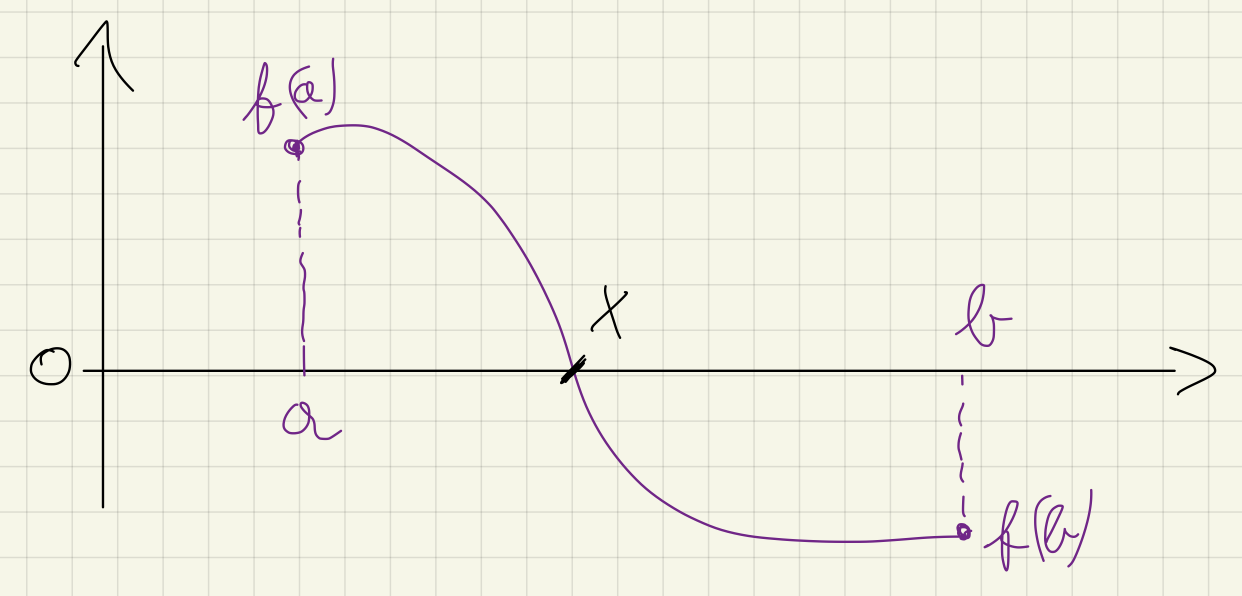

En divisant l'intervalle de départ par deux à chaque itération et en étudiant le signe de $f$ aux extrémités de l'intervalle, on peut ainsi s'approcher progressivement de la racine.<br>
Vous allez construire une **fonction** python (avec `def`) qui implémente cet algorithme. Cette fonction prendra en input:
- La fonction $f$. 
- Les bornes $a$ et $b$ de l'intervalle $[a,b]$ sur lequel on veut chercher une racine
- La tolérance $\epsilon$ pour que l'algorithme stoppe une fois qu'elle est atteinte. 

Elle renverra en output la racine (notée $x$ ci-dessous).<br>
L'algorithme est le suivant:
<ol>
    <li> Si $f(a)*f(b)>=0$, alors on renvoie une erreur et on quitte la fonction.</li>
    <li> Sinon, tant que $\frac{b-a}{2}>\epsilon$, on itère (boucle while):
    <ol>
        <li>On calcule le point milieu de l'intervalle: $x=\frac{a+b}{2}$.</li>
        <li> Si $f(x)=0$, alors $x$ est une racine et on a terminé.</li>
        <li> Sinon si $f(a)*f(x)<0$, alors la racine se trouve sur l'intervalle $]a,x[$. On écrase alors l'ancienne valeur de $b$ comme suit: $b=x$.</li>
        <li> Sinon, c'est que $f(a)*f(x)>0$, et la racine se trouve sur l'intervalle $]x,b[$. On écrase alors l'ancienne valeur de $a$ comme suit: $a=x$.</li>
        </ol>
Une fois sorti de la boucle, la racine est $x=\frac{a+b}{2}$ (on met à jour la valeur de $x$ avec les dernières valeurs de $a$ et $b$).
</ol>
Une fois que votre fonction est prête, utilisez-la pour déterminer la racine de
\begin{equation}
f(x)=\cos^2(2x)-x^2
\end{equation}
sur l'intervalle $]0,1.5[$. Comparez ensuite cette solution avec celle donnée par `fsolve` de scipy. Affichez ces deux résultats.

In [2]:
def bissection(f,a,b,eps):
    try:
        assert f(a)*f(b)<0
    except AssertionError:
        print("f(a) et f(b) doivent être de signe différent")
        return
    while (b-a)/2.>eps:
        x=(a+b)/2.
        if f(x)==0:
            break
        elif f(a)*f(x)<0:
            b=x
        else:
            a=x
    return (a+b)/2.

In [3]:
def f(x): return np.cos(2*x)**2-x**2
racine_biss=bissection(f,0,1.5,1e-6)
print("Racine obtenue par bissection: x="+str(racine_biss))
racine_fsolve=sciop.fsolve(f,1.3)
print("Racine obtenue par la fonction fslove de scipy: x="+str(racine_fsolve[0]))

Racine obtenue par bissection: x=0.5149333477020264
Racine obtenue par la fonction fslove de scipy: x=0.5149332646611294


On constate que les deux solutions sont égales jusqu'à la 6ème décimale.<br>
Logique, c'est la valeur de la tolérance `eps` dans notre algorithme. 